In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("poster")

plt.style.use('fivethirtyeight')

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

In [2]:
# %load stat_func.py
# stat functions

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

def successive_poisson(tau1, tau2, size=1):
    '''a function to sample out of the distribution'''
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics

# Formulating and simulating Hypothesis


**Hypothesis**
> county-level voting in (OH&PA) have identical probability distributions


## Hypothesis testing
- asssessment of houw reasonable the observed data are assuming a  hypothesis is true

## Null Hypothesis
- another name for the hypothesis you aare testing


## Permutation
- Random reordering of enties in an array



In [3]:
df = pd.read_csv('2008_swing_states.csv')
dem_share_PA = df[df['state'] == 'PA']['dem_share'].as_matrix()
dem_share_OH = df[df['state'] == 'OH']['dem_share'].as_matrix()

In [4]:
x_oh,y_oh = ecdf(dem_share_OH)
x_pa,y_pa = ecdf(dem_share_PA)

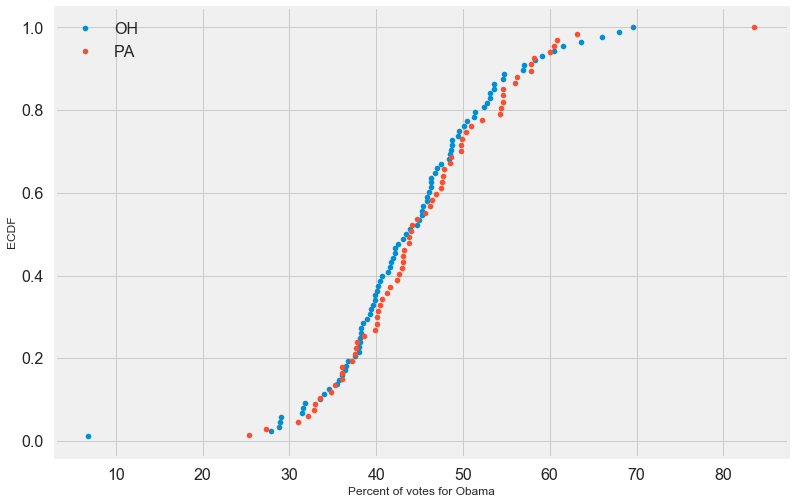

In [5]:
fig, ax = plt.subplots(figsize=a4_dims)
x_oh,y_oh = ecdf(dem_share_OH)
x_pa,y_pa = ecdf(dem_share_PA)


_ = plt.plot(x_oh, y_oh,marker='.', linestyle='none')
_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.xlabel('Percent of votes for Obama')
_ = plt.legend(["OH", "PA"])
_ = plt.ylabel('ECDF')
plt.show()

## Compare summary stataistics

|       | PA  | OH  | PA-OH diff  |   
|-------|---|---|---|---|
|mean   | 45.5% |44.3%   |1.2%   |   
|median |44.0%   |43.7%   |0.4%   |   
| std   |9.8%   |9.9%   | -0.1%  |   

In [6]:
len(dem_share_OH)

88

In [7]:
len(dem_share_PA)

67

# Generating a  permuation sample

In [8]:

# create a single array with all of the counties in it( as a tuple)
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))


#permutate the entries in the array
dem_share_perm = np.random.permutation(dem_share_both)

# Permuation samples

# assing the first 67 to be laeled Pennsilvania
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]

# assign the last 88 to be Ohio
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

In [9]:
len(perm_sample_OH)

88

In [10]:
len(perm_sample_PA)

67

---
# Let's Practice

# Generating a permutation sample

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last` n2` entries as the permutation sample of the second array.


- Concatenate the two input arrays into one using `np.concatenate()`. Be sure to pass in `data1` and `data2` as one argument (`data1, data2`).
- Use `np.random.permutation()` to permute the concatenated array.
- Store the first `len(data1)` entries of`permuted_data` as `perm_sample_1` and the last `len(data2)` entries of` permuted_data` as `perm_sample_2`. In practice, this can be achieved by using` :len(data1)` and `len(data1)`: to slice `permuted_data`.
- Return `perm_sample_1` and `perm_sample_2`.

In [11]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays `rain_july` and `rain_november`.

As a reminder, `permutation_sample()` has a function signature of `permutation_sample(data_1, data_2)` with a return value of 

```
permuted_data[:len(data_1)], 
permuted_data[len(data_1):]
```
where

```python
permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))

```


- Write a `for` loop to 50 generate permutation samples, compute their ECDFs, and plot them.
- Generate a permutation sample pair from `rain_july` and `rain_november` using your `permutation_sample()` function.
- Generate the `x` and` y` values for an ECDF for each of the two permutation samples for the ECDF using your` ecdf()` function.
- Plot the ECDF of the first permutation sample (`x_1` and `y_1`) as dots. Do the same for the second permutation sample (`x_2` and `y_2`).
- Generate `x` and `y` values for ECDFs for the `rain_july` and `rain_november` data and plot the ECDFs using respectively the keyword arguments `color='red'` and `color='blue'`.
- Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

In [12]:
rain_july = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

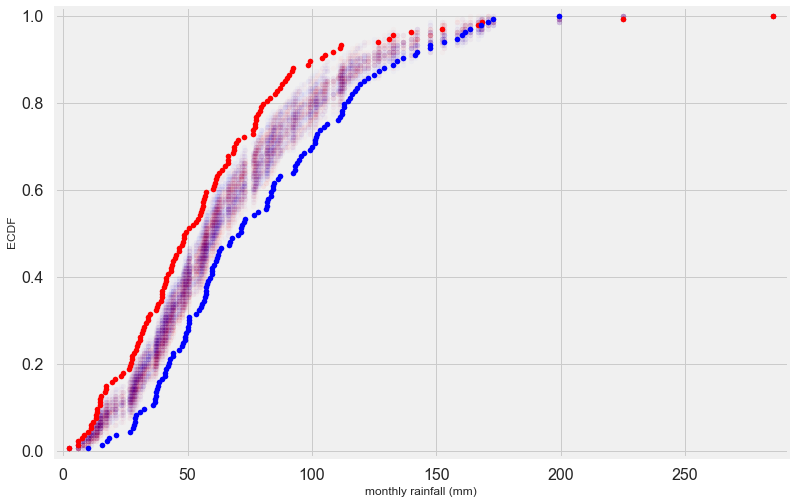

In [13]:
fig, ax = plt.subplots(figsize=a4_dims)

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

---
# Testing Statistics and p-values

## Hypothesis testing 

- Assessment of how reasonable the observed data are assuming a hypothesis

## Test statistic

- a single number tha tcan be computed from observed data and from data you simualte under the null hypothesis

- it serves as a basis of comparision between the two


## PErmuation replicate

In [14]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

1.9077357530529113

In [15]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # original data

1.1582360922659447

## P-value

- the probability of obtaining a value of your test statistic that is at leas t as exteme as what was obseved, under the assumtion the null hypothesis is true
- **NOT** teh probability that the null hypothesis is Ttrue

## Statistical significance

- determinded by the smallest of a p-value

## Null hypothesisisingificacne testing (NHST)

- anothe rname for what we are doin gin this chapter

statistical significance $\neq$ practical significance

# Let's Practice!

# Generating permutation replicates
As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.


- Define a function with this signature: `draw_perm_reps(data_1, data_2, func, size=1)`.
- Initialize an array to hold the permutation replicates using `np.empty()`.
- Write a for loop to:
- Compute a permutation sample using your `permutation_sample()` function
- Pass the sample into func to compute the replicate and store the result in your array of replicates.
- Return the array of replicates.

In [16]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates =  np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Look before you leap: EDA before hypothesis testing
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, `df`, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).


- Use `sns.swarmplot()` to make a bee swarm plot of the data by specifying the `x, y`, and data keyword arguments.
- Label your axes.
- Show the plot.

In [17]:
df = pd.read_csv('frog_tongue.csv')
mydf = df[['ID', 'impact force (mN)']]
mydf.columns = ['ID', 'impact_force']

In [18]:
A = mydf.loc[20:39]
A['ID'] = 'A'
B = mydf.loc[60:79]
B['ID'] = 'B'

frames = [A,B]
df = pd.concat(frames)

/Users/franciscosalas/miniconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/franciscosalas/miniconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


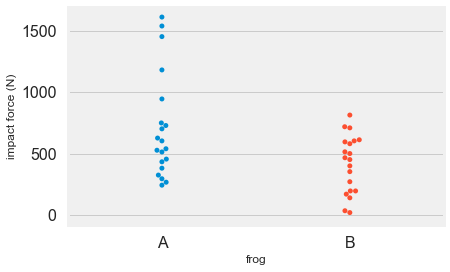

In [19]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)


# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

# Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays `force_a` and `force_b`.

- Define a function with call signature `diff_of_means(data_1, data_2)` that returns the differences in means between two data sets, mean of `data_1` minus mean of `data_2`.
- Use this function to compute the empirical difference of means that was observed in the frogs.
- Draw 10,000 permutation replicates of the difference of means.
- Compute the p-value.
- Print the p-value

In [20]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [21]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0055


# Bootstrap hypothesis test
## Pipeline for hypothesis testing

0. clearly state the null hypothesis
0. define your test statistic
0. generate many sets of simulated data assuming the null hypothesis is true
0. compute teh test statistic for each simulated data set
0. the p-value is teh fraction of you  simulated data sets fow which te test statistic is at least as extreme as for the real data.

## Null hypothesis

- the true mean speed of light in Michelson's experimetns was actually Newcomb's reported value

In [22]:
df = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light = df['velocity of light in air (km/s)'].as_matrix()

In [23]:
newcomb_value = 299860
michelson_shifted = michelson_speed_of_light \
- np.mean(michelson_speed_of_light) + newcomb_value

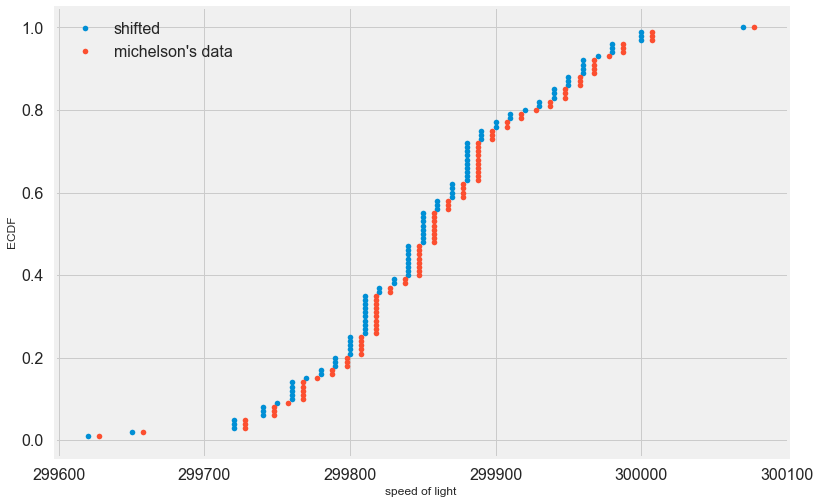

In [24]:
fig, ax = plt.subplots(figsize=a4_dims)

# Compute and plot ECDF from original data

x, y = ecdf(michelson_speed_of_light)
_ = plt.plot(x, y, marker='.',linestyle='none')

x_, y_ = ecdf(michelson_shifted,)
_ = plt.plot(x_, y_, marker='.',linestyle='none')



# Make margins and label axes
_ = plt.legend(["shifted", "michelson's data"])
_ = plt.xlabel('speed of light')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## Calculating the test statistic

In [25]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

In [26]:
diff_obs = diff_from_newcomb(michelson_speed_of_light)

In [27]:
diff_obs

-7.599999999976717

## computing the p-value

In [28]:
bs_replicate = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)

In [29]:
p_value = np.sum(bs_replicate <= diff_obs)/ 10000

In [30]:
p_value

0.1624

## One sample test
- compare one set of data to a single number

## Two sample test 
- compare twos ets of data

---
# Let's Practice!

# A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

---

- Translate the impact forces of Frog B such that its mean is 0.55 N.
- Use your `draw_bs_reps()` function to take 10,000 bootstrap replicates of the mean of your translated forces.
- Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of Frog B. Note that the variable of interest here is `force_b`.
- Print your p-value.

In [31]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b)+ 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0059


> Great work! The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

# A bootstrap test for identical distributions
In the video, we looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as `force_a` and `force_b`.

---

- Compute the observed difference in impact force using the `diff_of_means()` function you already wrote.
- Create an array that is the concatenation of `force_a` and `force_b`.
- Initialize the bs_replicates array using `np.empty()` to store 10,000 bootstrap replicates.
- Write a for loop to
- Generate a bootstrap sample from the concatenated array.
- Compute the difference in means between the first `len(force_a)` last `len(force_b)` entries of the bootstrap sample.
- Compute and print the p-value from your bootstrap replicates


In [32]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0079


>Great work! You may remember that we got p = 0.0063 from the permutation test, and here we got p = 0.0055. These are very close, and indeed the tests are testing the same thing. However, the permutation test exactly simulates the null hypothesis that the data come from the same distribution, whereas the bootstrap test approximately simulates it. As we will see, though, the bootstrap hypothesis test, while approximate, is more versatile.

# A two-sample bootstrap hypothesis test for difference of means.
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects `forces_concat` and `empirical_diff_means` are already in your namespace


---

- Compute the mean of all forces (from forces_concat) using `np.mean()`.
- Generate shifted data sets for both `force_a` and `force_b` such that the mean of each is the mean of the concatenated array of impact forces.
- Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.
- Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of `Frog B` from those of` Frog A`.
- Compute and print the p-value from your bootstrap replicates.

In [33]:
forces_concat = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])
empirical_diff_means = 0.28825000000000006

In [34]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000

print('p-value =', p)

p-value = 0.0052


> Nice work! Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces